Import libraries

In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("ml mini data football.csv")


Data overview

In [3]:

print(df.shape)
print(df.head())
print(df.info())
print(df.isnull().sum())

(800, 19)
   Age  Height_cm  Weight_kg    Position  Training_Hours_Per_Week  \
0   22        173         64  Midfielder                11.575308   
1   18        170         67  Midfielder                12.275869   
2   22        186         75     Forward                12.254896   
3   20        172         62    Defender                 9.006678   
4   18        172         94  Midfielder                12.683668   

   Matches_Played_Past_Season  Previous_Injury_Count  Knee_Strength_Score  \
0                          36                      1            77.460279   
1                          37                      2            72.634442   
2                          12                      2            77.064490   
3                          11                      1            82.810232   
4                          10                      2            76.772859   

   Hamstring_Flexibility  Reaction_Time_ms  Balance_Test_Score  \
0              79.115738        284.487853    

Data Cleaning and preprocessing

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Features & target
X = df.drop("Injury_Next_Season", axis=1)
y = df["Injury_Next_Season"]



In [6]:
# Encode Position
le = LabelEncoder()
X["Position"] = le.fit_transform(X["Position"])

In [7]:
# Scale
scaler = StandardScaler()
X[X.columns] = scaler.fit_transform(X[X.columns])

In [8]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Train Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [10]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.93125
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        80
           1       0.95      0.91      0.93        80

    accuracy                           0.93       160
   macro avg       0.93      0.93      0.93       160
weighted avg       0.93      0.93      0.93       160



Model Saving Using Pickle

In [13]:
import pickle

In [14]:


pickle.dump(model, open("injury_model.pkl", "wb"))
pickle.dump(scaler, open("scaler.pkl", "wb"))
pickle.dump(le, open("position_encoder.pkl", "wb"))  # save encoder too


Visualization and Saving

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

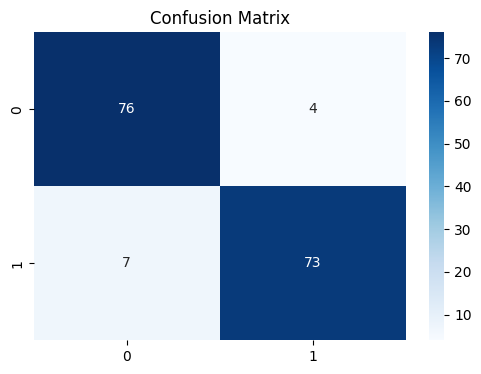

In [16]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png")
plt.show()

In [17]:
# Feature importance
importances = model.feature_importances_
features = X.columns

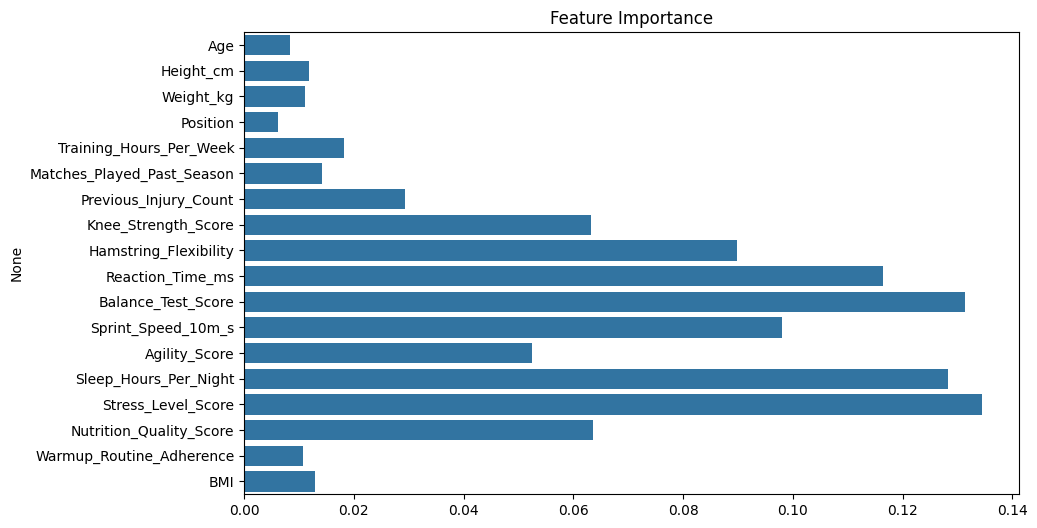

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.savefig("feature_importance.png")
plt.show()

Logistic Regression

Logistic Regression Accuracy: 0.96875
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        80
           1       0.97      0.96      0.97        80

    accuracy                           0.97       160
   macro avg       0.97      0.97      0.97       160
weighted avg       0.97      0.97      0.97       160



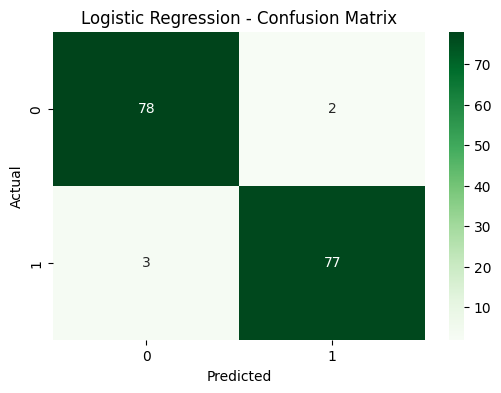

In [33]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)

# Accuracy & Report
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Save model
pickle.dump(lr_model, open("lr_model.pkl", "wb"))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6,4))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_lr.png")
plt.show()


XGBoost

c:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:22:27] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9125
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        80
           1       0.93      0.89      0.91        80

    accuracy                           0.91       160
   macro avg       0.91      0.91      0.91       160
weighted avg       0.91      0.91      0.91       160



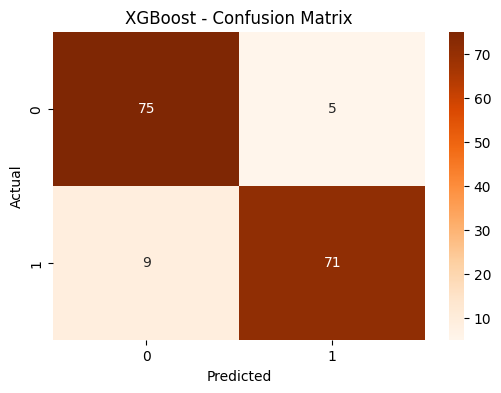

In [34]:
from xgboost import XGBClassifier

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)

# Accuracy & Report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# Save model
pickle.dump(xgb_model, open("xgb_model.pkl", "wb"))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(6,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("confusion_matrix_xgb.png")
plt.show()


Model Comparison


====== Model Accuracy Comparison ======
Random Forest Accuracy: 0.9125
Logistic Regression Accuracy: 0.9688
XGBoost Accuracy: 0.9125

Best Performing Model: Logistic Regression


C:\Users\DELL\AppData\Local\Temp\ipykernel_12148\1753821979.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


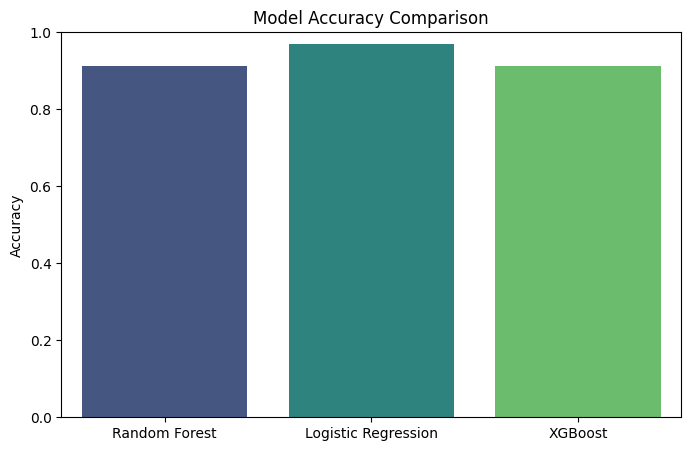

In [35]:
# Collect accuracies
acc_rf = accuracy_score(y_test, y_pred)
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_xgb = accuracy_score(y_test, y_pred_xgb)

print("\n====== Model Accuracy Comparison ======")
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(f"Logistic Regression Accuracy: {acc_lr:.4f}")
print(f"XGBoost Accuracy: {acc_xgb:.4f}")

# Best model
best_model = max(
    {"Random Forest": acc_rf, "Logistic Regression": acc_lr, "XGBoost": acc_xgb},
    key=lambda k: {"Random Forest": acc_rf, "Logistic Regression": acc_lr, "XGBoost": acc_xgb}[k]
)
print(f"\nBest Performing Model: {best_model}")

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(
    x=["Random Forest", "Logistic Regression", "XGBoost"],
    y=[acc_rf, acc_lr, acc_xgb],
    palette="viridis"
)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.savefig("model_accuracy_comparison.png")
plt.show()


# cd "C:\Users\DELL\OneDrive\Desktop\ml mini project"      
# streamlit run app.py